In [7]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
GBP=np.loadtxt('GBP.csv',delimiter=',')
GBP.shape

(2931, 2)

In [12]:
X=GBP[2100:2920,1]
y=GBP[2101:2921,1]
X_test=GBP[2100:2930,1]
y_test=GBP[2101:2931,1]
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)



In [13]:
svr_rbf=SVR(kernel='rbf',C=0.001,gamma=0.01)
svr_linear=SVR(kernel='linear',C=0.001)
svr_poly=SVR(kernel='poly',C=0.001,degree=5)

In [14]:
y_rbf=svr_rbf.fit(X,y).predict(X_test)
y_linear=svr_linear.fit(X,y).predict(X_test)
y_poly=svr_poly.fit(X,y).predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


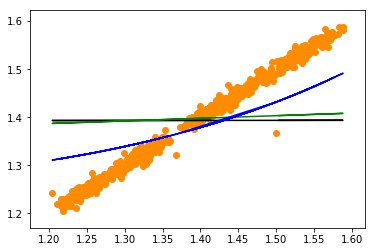

In [15]:
plt.scatter(X_test,y_test,color='darkorange',label='data')
plt.plot(X_test
         ,y_rbf,color='k',label='rbf')
plt.plot(X_test,y_linear,color='g',label='rbf')
plt.plot(X_test,y_poly,color='b',label='rbf')